## Import libraries required for analysis

In [1]:
# NBVAL_IGNORE_OUTPUT
# ^this is a magic comment to work around this issue https://github.com/ebmdatalab/custom-docker/issues/10
from change_detection import functions as chg
from lib.outliers import *  #This is copied into the local folder from a branch ebmdatalab pandas library - it will be placed in its own repo to install at a later dat

## Run change detection for the 3 OpenPrescribing opioid measures
- looks for changes in time-series data
- as described in https://www.bmj.com/content/367/bmj.l5205

In [2]:
# NBVAL_IGNORE_OUTPUT
# ^this is a magic comment to work around this issue https://github.com/ebmdatalab/custom-docker/issues/10
opioids_class = chg.ChangeDetection('ccg_data_opioid%',
                                    measure=True,
                                    direction='down',
                                    use_cache=True,
                                    overwrite=False,
                                    verbose=False,
                                    draw_figures='no')
opioids_class.run()

Using cached data


## Import results of change detection

In [3]:
opioids = opioids_class.concatenate_outputs()
opioids.head()

is.nbreak  is.tfirst  is.tfirst.pknown  \
measure            name                                           
ccg_data_opioidome 00C   0         NaN        NaN                 
                   00D   0         NaN        NaN                 
                   00J   0         NaN        NaN                 
                   00K   0         NaN        NaN                 
                   00L   0         NaN        NaN                 

                         is.tfirst.pknown.offs  is.tfirst.offs  is.tfirst.big  \
measure            name                                                         
ccg_data_opioidome 00C  NaN                    NaN             NaN              
                   00D  NaN                    NaN             NaN              
                   00J  NaN                    NaN             NaN              
                   00K  NaN                    NaN             NaN              
                   00L  NaN                    NaN             NaN              

                         is.slope.ma  is.slope.ma.prop  is.slope.ma.prop.lev  \
measure            name                                                        
ccg_data_opioidome 00C  NaN          NaN               NaN                     
                   00D  NaN          NaN               NaN                     
                   00J  NaN          NaN               NaN                     
                   00K  NaN          NaN               NaN                     
                   00L  NaN          NaN               NaN                     

                         is.intlev.initlev  is.intlev.finallev  \
measure            name                                          
ccg_data_opioidome 00C  NaN                NaN                   
                   00D  NaN                NaN                   
                   00J  NaN                NaN                   
                   00K  NaN                NaN                   
                   00L  NaN                NaN                   

                         is.intlev.levd  is.intlev.levdprop  
measure            name                                      
ccg_data_opioidome 00C  NaN             NaN                  
                   00D  NaN             NaN                  
                   00J  NaN             NaN                  
                   00K  NaN             NaN                  
                   00L  NaN             NaN

# Results
These are filtered:
- to only include CCGs that started within the highest 20% of all CCGs
- to remove any CCGs that have a short sudden spike that would lead the change detection algorithm to detect a sudden drop

and then sorted according to the largest total measured drop.

## Total Oral Morphine Equivalence
https://openprescribing.net/measure/opioidome

,Month when change detected,Measured proportional change,plots
link,,,
NHS VALE ROYAL CCG,2015-11-01,0.314002,
NHS GREAT YARMOUTH AND WAVENEY CCG,2017-02-01,0.273662,
"NHS HEYWOOD, MIDDLETON AND ROCHDALE CCG",2017-08-01,0.266179,
NHS HASTINGS AND ROTHER CCG,2017-05-01,0.249853,
"NHS EASTBOURNE, HAILSHAM AND SEAFORD CCG",2016-11-01,0.237043,
NHS NORTH TYNESIDE CCG,2018-02-01,0.201076,
NHS SOUTH TYNESIDE CCG,2017-05-01,0.192831,
NHS DONCASTER CCG,2017-02-01,0.169840,
NHS BOLTON CCG,2017-02-01,0.158531,

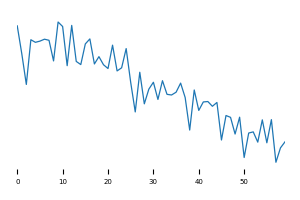
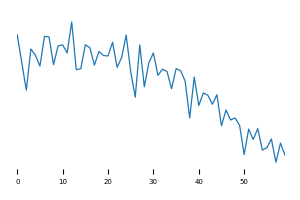
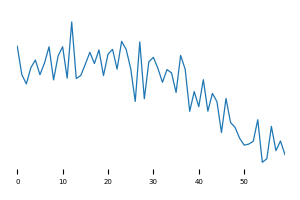
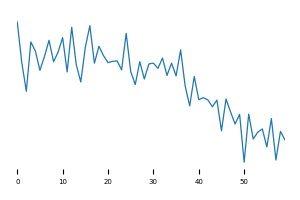
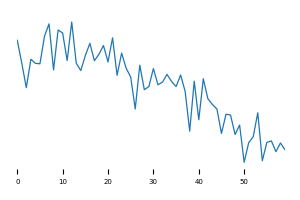
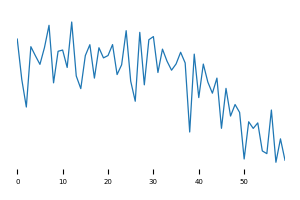
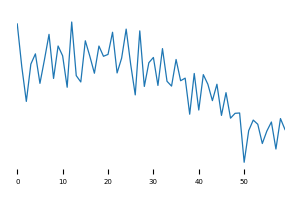
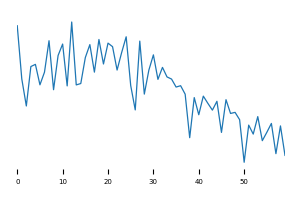
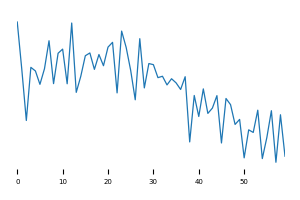
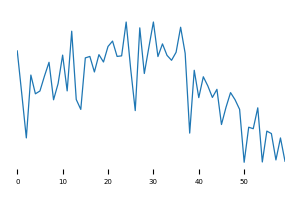

In [4]:
filtered_sparkline(opioids,
                   'ccg_data_opioid/ccg_data_opioidome',
                   'ccg_data_opioidome')

## High dose opioids as percentage regular opioids

https://openprescribing.net/measure/opioidspercent

,Month when change detected,Measured proportional change,plots
link,,,
NHS NORTH TYNESIDE CCG,2018-10-01,0.376589,
"NHS HEYWOOD, MIDDLETON AND ROCHDALE CCG",2018-10-01,0.338005,
NHS GREAT YARMOUTH AND WAVENEY CCG,2018-01-01,0.334177,
NHS ISLINGTON CCG,2016-02-01,0.283215,
NHS SOUTHEND CCG,2018-10-01,0.272701,
NHS SOUTH WEST LINCOLNSHIRE CCG,2015-08-01,0.254717,
NHS WIGAN BOROUGH CCG,2018-11-01,0.209043,
NHS SOUTH TEES CCG,2015-07-01,0.198744,
NHS DORSET CCG,2015-09-01,0.198648,

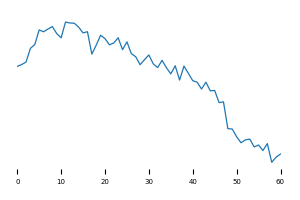
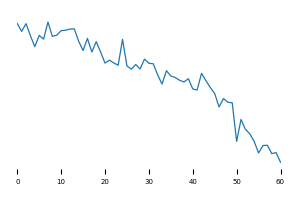
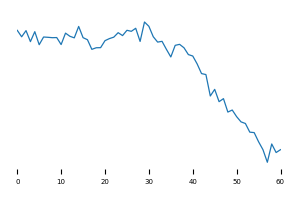
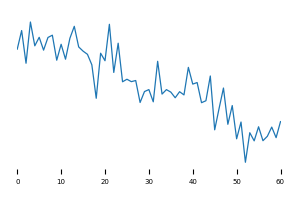
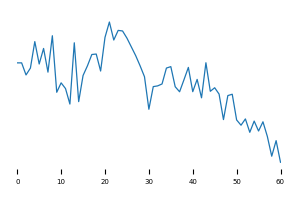
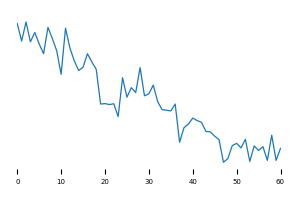
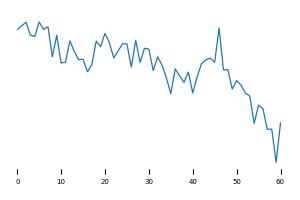
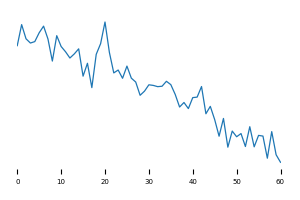
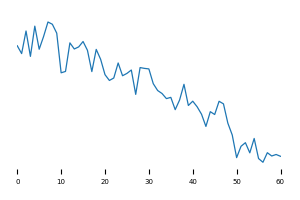
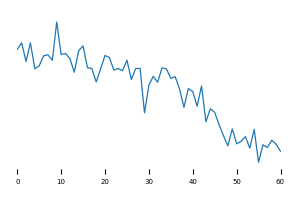

In [5]:
filtered_sparkline(opioids,
                   'ccg_data_opioid/ccg_data_opioidspercent',
                   'ccg_data_opioidspercent')

## High dose opioids per 1000 patients

https://openprescribing.net/measure/opioidper1000

,Month when change detected,Measured proportional change,plots
link,,,
NHS GREAT YARMOUTH AND WAVENEY CCG,2017-08-01,0.405234,
NHS HASTINGS AND ROTHER CCG,2017-12-01,0.396321,
"NHS HEYWOOD, MIDDLETON AND ROCHDALE CCG",2017-08-01,0.395678,
NHS SALFORD CCG,2017-08-01,0.383552,
NHS SOUTH TYNESIDE CCG,2016-11-01,0.379336,
NHS NORTH TYNESIDE CCG,2018-03-01,0.359595,
NHS KERNOW CCG,2016-04-01,0.359533,
NHS WIGAN BOROUGH CCG,2018-11-01,0.274411,
NHS SOUTH LINCOLNSHIRE CCG,2017-11-01,0.234168,

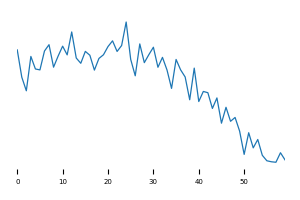
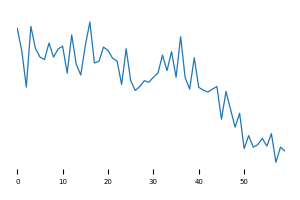
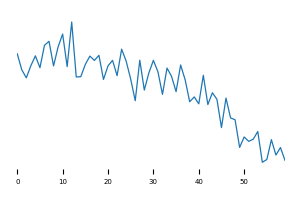
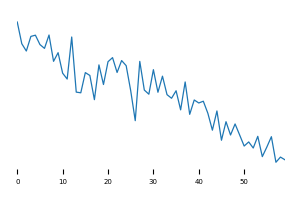
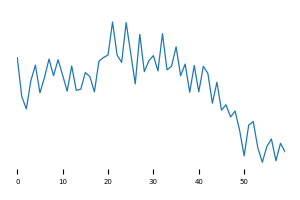
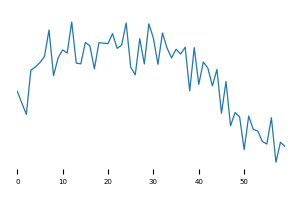
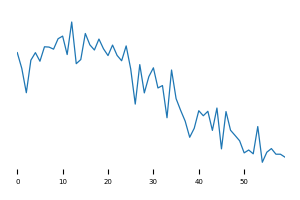
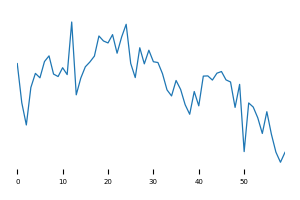
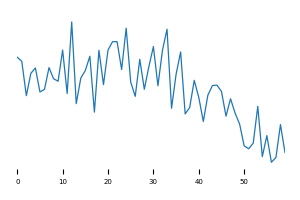
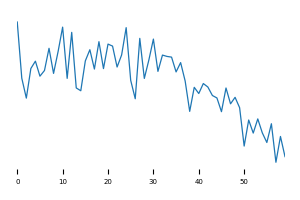

In [6]:
filtered_sparkline(opioids,
                   'ccg_data_opioid/ccg_data_opioidper1000',
                   'ccg_data_opioidper1000')